<a href="https://colab.research.google.com/github/terra-ryzing/DataLitPractice/blob/master/Homework_Assignment_(Analyzing_Distributions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework Assignment (Analyzing Distributions)

Part 1 Solution

In [31]:
from google.colab import files
uploaded = files.upload()

In [32]:
import pandas as pd
flights = pd.read_csv('formatted_flights.csv')
flights.head(10)

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.
5,5,12.0,United Air Lines Inc.
6,6,19.0,JetBlue Airways
7,7,-14.0,ExpressJet Airlines Inc.
8,8,-8.0,JetBlue Airways
9,9,8.0,American Airlines Inc.


In [33]:
unique_flight_names = flights['name'].unique()
unique_flight_names

array(['United Air Lines Inc.', 'American Airlines Inc.',
       'JetBlue Airways', 'Delta Air Lines Inc.',
       'ExpressJet Airlines Inc.', 'Envoy Air', 'US Airways Inc.',
       'Southwest Airlines Co.', 'Virgin America',
       'AirTran Airways Corporation', 'Alaska Airlines Inc.',
       'Endeavor Air Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'Mesa Airlines Inc.',
       'SkyWest Airlines Inc.'], dtype=object)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Flights')

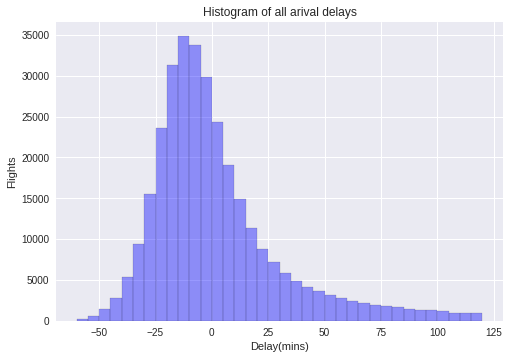

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
#histogram
sns.distplot(flights['arr_delay'], hist=True, kde=False, bins=int(180/5),
             color = 'blue', hist_kws={'edgecolor':'black'})
plt.title('Histogram of all arival delays')
plt.xlabel('Delay(mins)')
plt.ylabel('Flights')

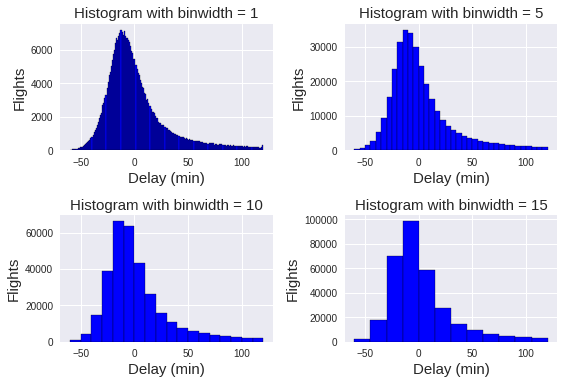

In [35]:
#histogram of varying binwidths
#show four binwidths
for i, binwidth in enumerate([1,5,10,15]):
  
  #setup the plot
  ax = plt.subplot(2, 2, i + 1)
  
  #draw the plot
  ax.hist(flights['arr_delay'], bins = int(180/binwidth),color='blue',
         edgecolor='black')
  # Title and labels
  ax.set_title('Histogram with binwidth = %d' % binwidth, size=15)
  ax.set_xlabel('Delay (min)', size = 15)
  ax.set_ylabel('Flights', size= 15)

plt.tight_layout()
plt.show()

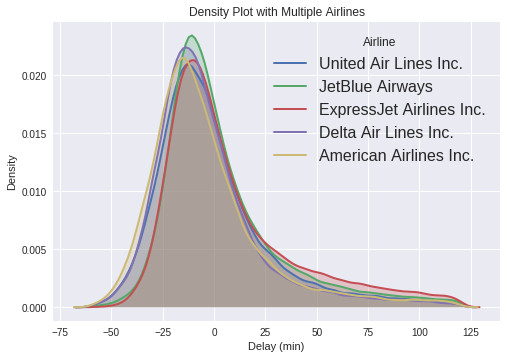

In [36]:
# List of five airlines to plot
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterate through the top five airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True,'linewidth': 2},
                 label = airline)
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines'); 
plt.xlabel('Delay (min)')
plt.ylabel('Density');

In [37]:
#Extracting top airlines
carrier_flights = pd.Series(flights.groupby('name')['name'].count())
carrier_flights = carrier_flights.sort_values(ascending=False)
top_airlines = carrier_flights.index[:16]
top_airlines

Index(['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
       'Delta Air Lines Inc.', 'American Airlines Inc.', 'Envoy Air',
       'US Airways Inc.', 'Endeavor Air Inc.', 'Southwest Airlines Co.',
       'Virgin America', 'AirTran Airways Corporation', 'Alaska Airlines Inc.',
       'Frontier Airlines Inc.', 'Mesa Airlines Inc.',
       'Hawaiian Airlines Inc.', 'SkyWest Airlines Inc.'],
      dtype='object', name='name')

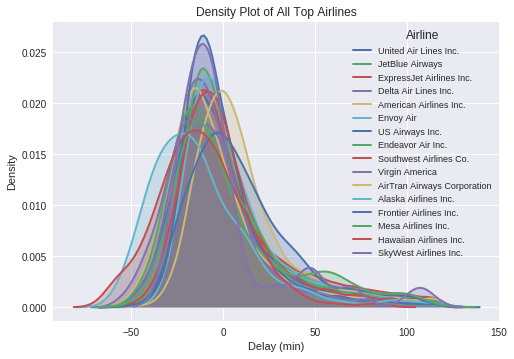

In [38]:
#Density plot of all top airlines
for top in top_airlines:
  # Subset to the airline
    subset = flights[flights['name'] == top]
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True,'linewidth': 2},
                 label = top)
plt.legend(prop={'size': 9}, title = 'Airline')
plt.title('Density Plot of All Top Airlines');
plt.xlabel('Delay (min)')
plt.ylabel('Density');

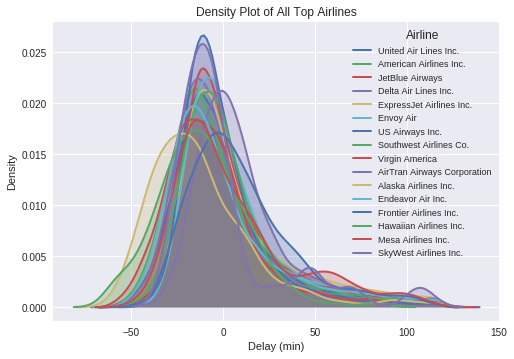

In [39]:
#Density plot of arrival_delays
for top in unique_flight_names:
  # Subset to the airline
    subset = flights[flights['name'] == top]
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True,'linewidth': 2},
                 label = top)
plt.legend(prop={'size': 9}, title = 'Airline')
plt.title('Density Plot of All Top Airlines');
plt.xlabel('Delay (min)')
plt.ylabel('Density');

From the above visualizations, I've arrived at the conclusion that the 'Alaska Airlines' will get me to my destination the earliest, because it has the least delay.

Part 2

Text(0, 0.5, 'Density')

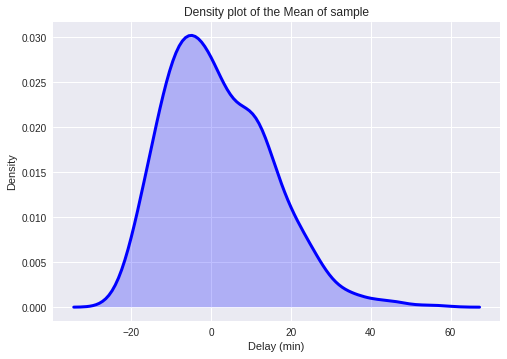

In [40]:
#Demonstrating/disproving Central Limit Theorem statements

#Calculating means of a random sample
import numpy as np
import random
means = []
for i in range(500):
  first_sample = random.choices(list(flights['arr_delay']), k=5)
  means.append(np.mean(first_sample))

#Plotting Sampling Distribution density of means
sns.distplot(means,hist=False,kde=True,bins=int(180/5), color = 'blue', 
             kde_kws = {'shade': True,'linewidth': 3})
plt.title('Density plot of the Mean of sample')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

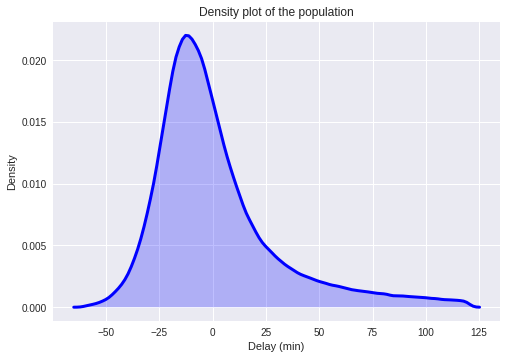

In [41]:
#Plotting density of the population
sns.distplot(flights['arr_delay'], hist=False, kde=True, bins=int(180/5),
             color = 'blue', kde_kws = {'shade': True,'linewidth': 3})
plt.title('Density plot of the population')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

From the above visualizations, we see that the sampling distribution of the mean is less spread than the values in the population from which the sample was drawn.(1)

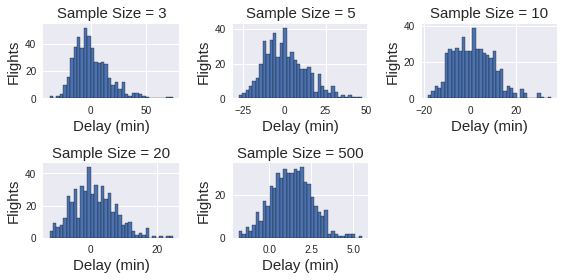

In [42]:
size = 500

#Graph for 5 samples
for i, size in enumerate([3, 5, 10, 20, 500]):
  # Set up the plot
  ax = plt.subplot(3, 3, i + 1)
  
  means = []
  for i in range(500):
    first_sample = random.choices(list(flights['arr_delay']), k=size)
    means.append(np.mean(first_sample))
  # Draw the plots
  ax.hist(means,bins = int(180/5),edgecolor='black')
  # Title and labels
  ax.set_title('Sample Size = ' + str(size), size = 15)
  ax.set_xlabel('Delay (min)', size = 15)
  ax.set_ylabel('Flights', size= 15)

plt.tight_layout()
plt.show()

From the above visualizations, we see that the sampling distribution is modeled by a normal distribution.(2)

Also bigger samples are leading to a smaller spread in the sampling distribution.(4)

In [43]:
from math import sqrt

pop_mean = np.mean(list(flights['arr_delay']))
pop_std_dev = np.std(list(flights['arr_delay']))

print('Mean of the Population: {}'.format(pop_mean))
print('Standard Deviation of the Population: {}'.format(pop_std_dev))

Mean of the Population: 1.2971432896160044
Standard Deviation of the Population: 29.06435519665472


In [0]:
for i, n in enumerate([10, 50, 100, 500, 1000]):
  means = []
  for _ in range(5000):
    sample = random.choices(list(flights['arr_delay']), k=n)
    means.append(np.mean(sample))
    
  average_means = np.average(means)
  std_dev_of_means = np.std(means)
  sqrt_std_dev = pop_std_dev / sqrt(n)
  plt.subplots()
  plt.title('Sample size = {}, Mean = {}, Std Dev = {}, Sample Std Dev = {}'.\
              format(n, average_means, std_dev_of_means, sqrt_std_dev), fontsize=20)
  sns.distplot(means)
  

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
